In [1]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import scipy.spatial.distance as distance
my_year_month_fmt = mdates.DateFormatter('%m/%y')

/Users/mac/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Preprocessing data

In [3]:
new_tickers = pd.read_excel('SP500.xlsx', header=0)
new_tickers = new_tickers.Symbol

In [4]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = new_tickers
all_data = get(tickers, datetime.datetime(2000, 1, 1), datetime.datetime(2018, 6, 1))


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [5]:
SPY = get(['SPY'], datetime.datetime(2000, 1, 1), datetime.datetime(2018, 6, 1))
SPY = SPY[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

[*********************100%***********************]  1 of 1 downloaded


In [6]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
#daily_close_px['SPY']=SPY
daily_close_px = daily_close_px.drop(['WELL','BHF','PXD'],axis=1)
daily_close_px = daily_close_px.fillna(daily_close_px.mean())
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

In [7]:
corr_mat = daily_pct_change.corr()
corr_mat.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.212045,0.184054,0.357130,0.078464,0.178061,0.260036,0.182459,0.277287,0.414373,...,0.256623,0.483812,0.300117,0.325128,0.318690,0.139903,0.303701,0.231144,0.309058,0.087235
AAL,0.212045,1.000000,0.221055,0.185724,0.047423,0.172430,0.158121,0.184210,0.173088,0.198337,...,0.355242,0.173670,0.177642,0.264416,0.227209,0.078817,0.275688,0.195603,0.350758,0.075023
AAP,0.184054,0.221055,1.000000,0.165630,0.077201,0.150826,0.116039,0.177044,0.191596,0.164181,...,0.187271,0.158063,0.229067,0.221614,0.181024,0.106510,0.245336,0.199234,0.216104,0.068839
AAPL,0.357130,0.185724,0.165630,1.000000,0.034766,0.165334,0.187723,0.159895,0.223514,0.399250,...,0.223990,0.445630,0.264218,0.231856,0.276406,0.074030,0.221637,0.191893,0.247902,0.066725
ABBV,0.078464,0.047423,0.077201,0.034766,1.000000,0.112531,0.064364,0.141728,0.060719,0.067495,...,0.031218,0.058454,0.078716,0.092019,0.052986,0.152935,0.073539,0.108567,0.060257,0.234920


# EMA

In [8]:
ema_short = daily_close_px.ewm(span=63, adjust=False).mean()
ema_medium = daily_close_px.ewm(span=126, adjust = False).mean()
ema_long = daily_close_px.ewm(span=252,adjust=False).mean()
ema_avg = (ema_short+ema_medium+ema_long)/3

In [9]:
ema_avg.tail()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-25,65.846694,47.730758,113.864664,170.690225,96.454190,88.287106,276.215420,57.492249,149.439071,206.266552,...,48.824413,68.322706,78.461885,53.967352,29.131502,70.792130,80.965607,114.755823,52.339585,77.705184
2018-05-29,65.762199,47.661211,114.046562,170.952333,96.455597,88.180476,277.914806,57.538783,149.476889,206.778846,...,48.908852,68.313424,78.462479,53.840523,29.101439,70.763404,80.963781,114.659037,52.365538,77.766092
2018-05-30,65.695120,47.587865,114.307896,171.201745,96.521584,88.104907,279.600944,57.598515,149.559908,207.376654,...,48.996713,68.300608,78.519408,53.709703,29.072610,70.752894,80.973250,114.589590,52.402359,77.849866
2018-05-31,65.615646,47.520505,114.564865,171.434557,96.512766,87.994691,281.116812,57.647266,149.636185,207.997036,...,49.082810,68.289829,78.570227,53.551605,29.033574,70.723012,80.961169,114.537340,52.425449,77.918504
2018-06-01,65.553820,47.463013,114.810822,171.724373,96.488504,87.909016,282.805755,57.711167,149.768835,208.642220,...,49.173927,68.320750,78.630639,53.389692,28.998515,70.720509,80.960248,114.506263,52.463862,78.017497


# RSI 

In [10]:
window_length = 14
# Get diff in prices 
delta = daily_close_px.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

In [11]:
# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
# Calculate the EWMA up and down
roll_up1 = pd.stats.moments.ewma(up, window_length)
roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  import sys


In [12]:
# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))
RSI1.tail()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-25,39.768823,52.219546,64.344464,65.373678,48.274398,46.568690,78.134681,60.636584,55.605830,65.724618,...,61.052019,52.625010,47.561935,39.757632,40.988669,42.893204,44.902885,41.842750,55.486727,50.562047
2018-05-29,36.193493,46.602977,62.087134,63.483410,44.388104,39.477119,71.537297,54.020972,48.392712,63.047287,...,52.620190,47.655960,46.403870,36.374597,39.844889,39.786588,42.191178,37.326645,42.909402,48.231534
2018-05-30,39.932125,45.452225,67.892640,62.347247,53.253676,44.329737,71.968557,57.588667,54.780157,68.307584,...,57.879114,46.928196,58.031926,34.868771,40.180233,44.545485,45.597695,42.404677,46.621980,53.920575
2018-05-31,37.759197,46.620964,67.996033,60.519446,44.512421,39.951659,65.242594,54.416037,53.946984,69.960828,...,57.625398,47.297765,56.915089,29.007518,35.892613,40.562569,40.561260,45.360632,43.079212,50.490767
2018-06-01,41.564363,48.870621,67.273826,66.198747,42.863969,43.553434,69.768991,58.416043,60.872849,71.670530,...,63.755896,55.613383,58.840971,27.816173,37.904147,47.239888,43.828685,48.951134,48.070540,57.182885


In [13]:
rsi_df = pd.DataFrame(RSI1)
rsi_df = rsi_df.fillna(50)

In [14]:
#writer = pd.ExcelWriter('hedge funds data.xlsx')
#RSI1.to_excel(writer,'RSI63days')
#daily_close_px.to_excel(writer,'Daily_close')
#daily_pct_change.to_excel(writer,'PCT Change')
#corr_mat.to_excel(writer,'Corr Matrix')
#ema_avg.to_excel(writer,'EMA average')
#writer.save()

## Resample data to monthly return

In [15]:
monthly_close_price = daily_close_px.resample('M').mean()
monthly_pct_change = monthly_close_price.pct_change()
#monthly_close_price = monthly_close_price.drop(['WELL','BHF'],axis=1)
#monthly_close_price.head()

# Momentum 

In [16]:
def momentum(dataDf, period):
    return dataDf.rolling(period,min_periods = 12).sum().sub(dataDf.mean())
def rsi(data, period):
    data_upside = data.sub(data.shift(1), fill_value=0)
    data_downside = data_upside.copy()
    data_downside[data_upside > 0] = 0
    data_upside[data_upside < 0] = 0
    avg_upside = data_upside.rolling(period).ewm(span=period).mean()
    avg_downside = - data_downside.rolling(period).ewm(span=period).mean()
    rsi = 100 - (100 * avg_downside / (avg_downside + avg_upside))
    rsi[avg_downside == 0] = 100
    rsi[(avg_downside == 0) & (avg_upside == 0)] = 0

    return rsi

In [17]:
index = monthly_pct_change.index
mscores = pd.DataFrame(index=index,columns=monthly_pct_change.columns)
mscores = momentum(monthly_pct_change, 13)
returns = pd.DataFrame(index=index,columns=monthly_pct_change.columns)
day = 21
mscores = mscores.fillna(0)

In [18]:
mscores = mscores[mscores.index.isin(monthly_pct_change.index)]

In [19]:
def compute_basket_returns(factor, forward_returns, number_of_baskets, index):

    data = pd.concat([factor.loc[index],forward_returns.loc[index]], axis=1)
    # Rank the equities on the factor values
    data.columns = ['Factor Value', 'Forward Returns']
    data.sort_values('Factor Value',ascending=True)
    # How many equities per basket
    equities_per_basket = np.floor(len(data.index) / number_of_baskets)

    basket_returns = np.zeros(number_of_baskets)

    # Compute the returns of each basket
    for i in range(number_of_baskets):
        start = i * equities_per_basket
        if i == number_of_baskets - 1:
            # Handle having a few extra in the last basket when our number of equities doesn't divide well
            end = len(data.index) - 1
        else:
            end = i * equities_per_basket + equities_per_basket
        
        basket_returns[i] = data.iloc[int(start):int(end)]['Forward Returns'].mean()
        
    return basket_returns

[ 2.35133614  2.83472125  2.27756368  2.32136681  2.25286368  2.03913079
  2.4905125   2.16652292  2.24414272  2.25633533  2.13148951  2.05126798
  2.46423797  2.33348041  2.453423    2.45694465  2.06465596  2.69616771
  2.32541282  2.23191959  2.03792982]


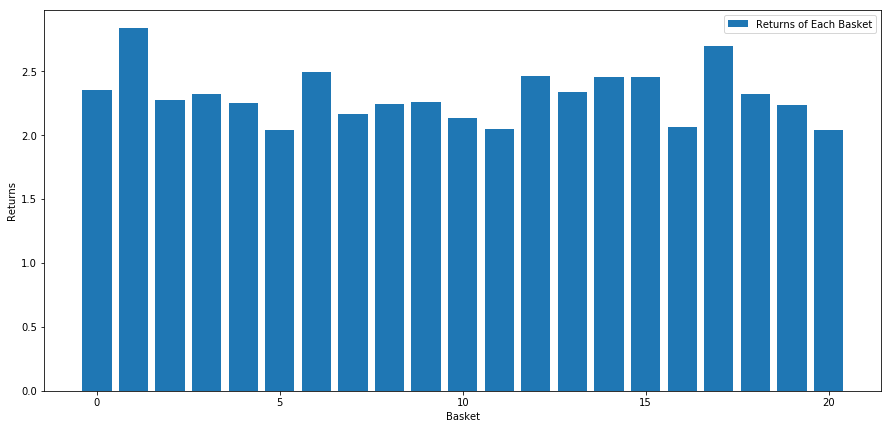

In [20]:
number_of_baskets = 21
mean_basket_returns = np.zeros(number_of_baskets)
new_scores = mscores.fillna(0)

forward_returns = monthly_close_price/monthly_close_price.shift(1)-1
forward_returns = forward_returns.fillna(0)

for m in forward_returns.index.intersection(new_scores.index):
    basket_returns = compute_basket_returns(new_scores, forward_returns, number_of_baskets, m)
    mean_basket_returns += basket_returns

mean_basket_returns /= 1    
print(mean_basket_returns)
# Plot the returns of each basket
plt.figure(figsize=(15,7))
plt.bar(range(number_of_baskets), mean_basket_returns)
plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket'])
plt.show()

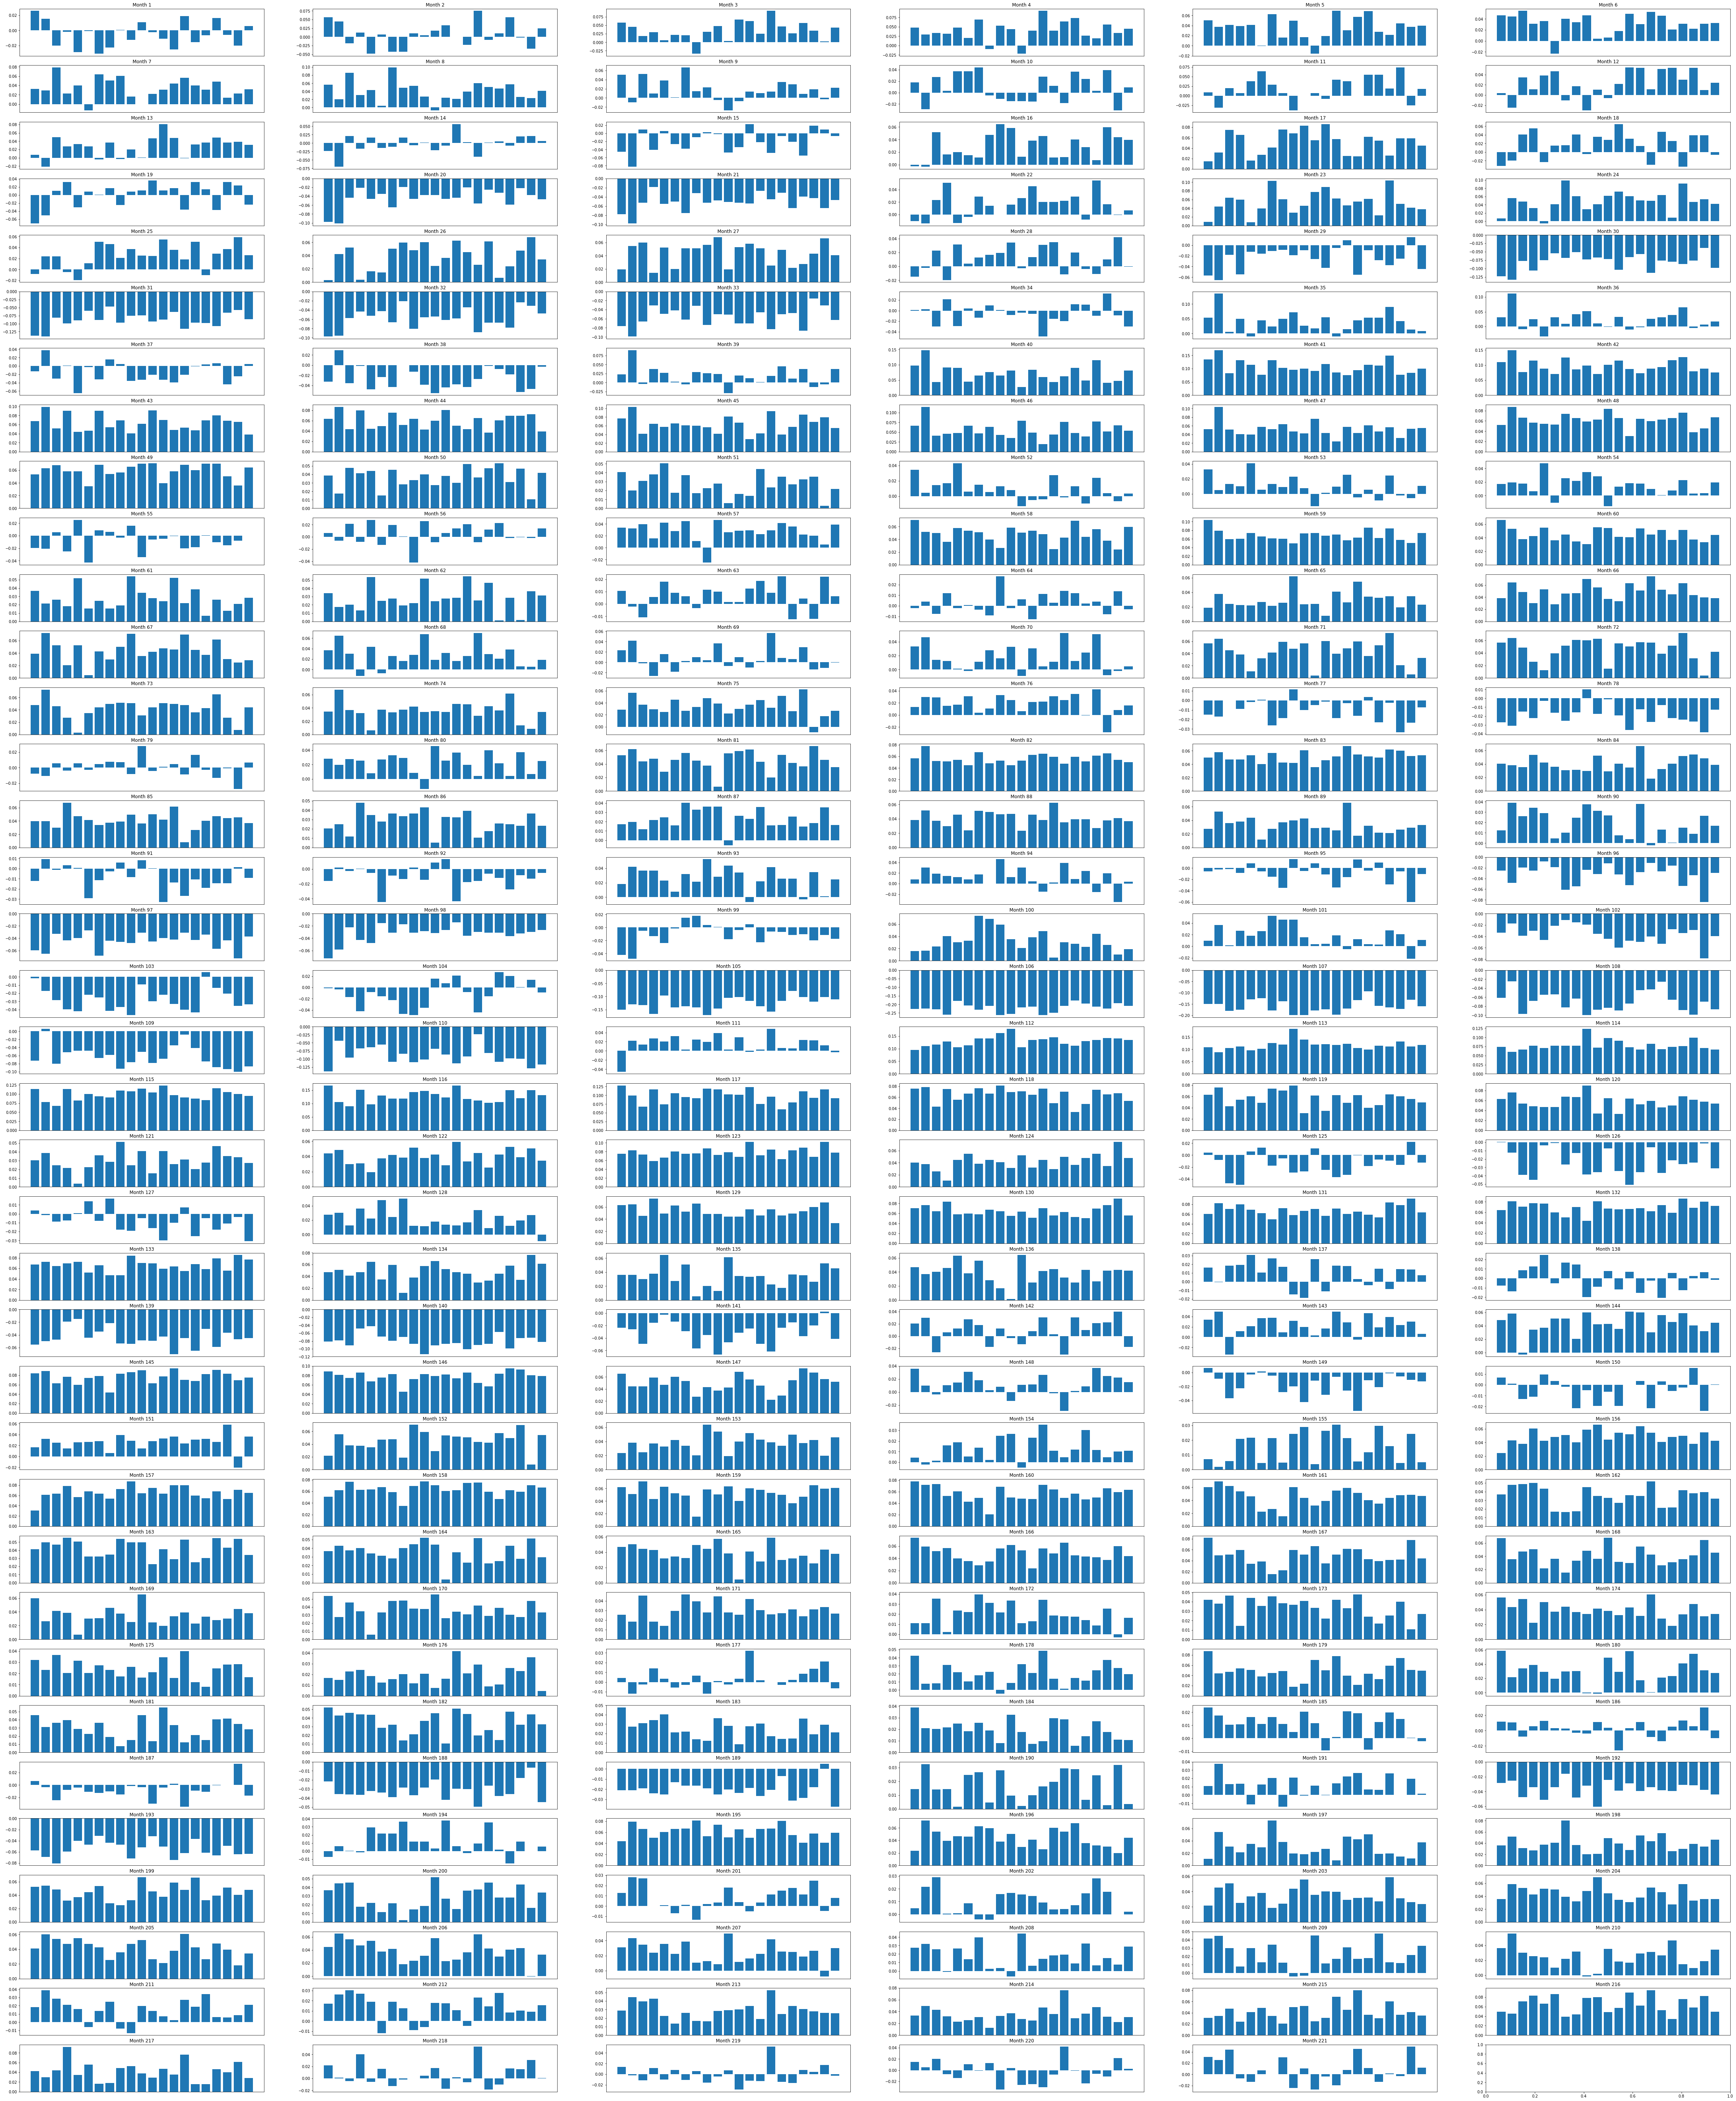

In [21]:
total_months = mscores.index
months_to_plot = total_months.size
monthly_index = total_months[:months_to_plot]
mean_basket_returns = np.zeros(number_of_baskets)
strategy_returns_long = pd.Series(index = monthly_index)
strategy_returns_short = pd.Series(index = monthly_index)
strategy_returns = pd.Series(index = monthly_index)
f, axarr = plt.subplots(int(monthly_index.size/6), 6,figsize=(80, 100))
for month in range(1,monthly_index.size):
    temp_returns = forward_returns.loc[monthly_index[month-1]:monthly_index[month]]
    temp_scores = new_scores.loc[monthly_index[month-1]:monthly_index[month]]
    for m in temp_returns.index.intersection(temp_scores.index):
        basket_returns = compute_basket_returns(temp_scores, temp_returns, number_of_baskets, m)
        mean_basket_returns += basket_returns
    
    strategy_returns[monthly_index[month]] =  mean_basket_returns[1] - mean_basket_returns[16]
    
    
    mean_basket_returns /= temp_returns.index.intersection(temp_scores.index).size
    
    r = int(np.floor((month-1) / 6))
    c = (month-1) % 6
    axarr[r, c].bar(range(number_of_baskets), mean_basket_returns)
    axarr[r, c].xaxis.set_visible(False)
    axarr[r, c].set_title('Month ' + str(month))
plt.show()

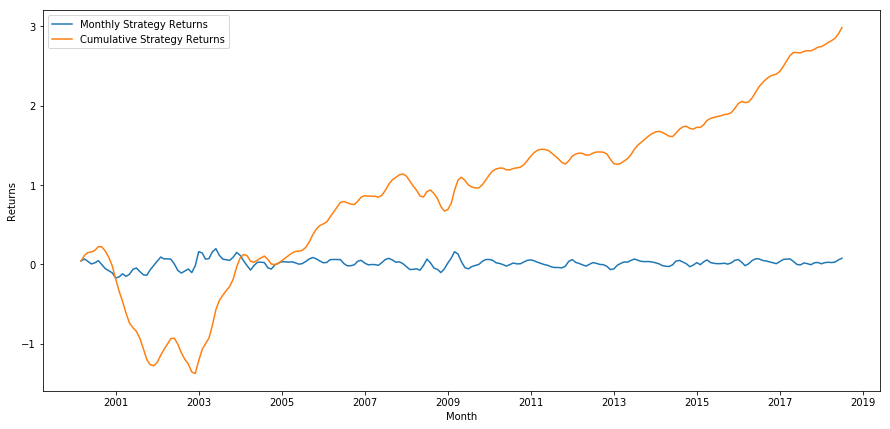

In [22]:
plt.figure(figsize=(15,7))
plt.plot(strategy_returns)
plt.ylabel('Returns')
plt.xlabel('Month')
plt.plot(strategy_returns.cumsum())
plt.legend(['Monthly Strategy Returns','Cumulative Strategy Returns'])
plt.show()

In [23]:
total_return = strategy_returns.sum()
ann_return = 100*((1 + total_return)**(12.0 /float(strategy_returns.index.size))-1)
ann_return

7.760145145279451

In [24]:
#ranks = (mom.T - mom.T.mean()).T.mean()
#lower, upper = ranks.quantile([.05, .95])
#shorts = ranks[ranks <= lower]
#longs = ranks[ranks >= upper]


# BETA

In [25]:
def beta(df):
    # first column is the market
    X = df.values[:, [-1]]
    # prepend a column of ones for the intercept
    X = np.concatenate([np.ones_like(X), X], axis=1)
    # matrix algebra
    b = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(df.values[:, :-1])
    return pd.Series(b[1], df.columns[:-1], name='Beta')

In [26]:
new_df = daily_pct_change.fillna(value=0)
new_df['SPY'] = SPY.pct_change()
new_df = new_df.fillna(value=0)
new_df.head()

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,SPY
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2000-01-04,-0.076389,0.0,0.0,-0.084310,0.0,-0.068273,-0.023973,-0.028571,0.0,-0.083889,...,-0.022727,-0.019154,0.000000,-0.046511,0.0,-0.020100,0.0,-0.048423,0.0,-0.039105
2000-01-05,-0.062030,0.0,0.0,0.014634,0.0,0.077587,0.010526,-0.001838,0.0,0.019771,...,-0.021888,0.054516,0.017285,0.051491,0.0,0.005128,0.0,-0.001184,0.0,0.001789
2000-01-06,-0.038076,0.0,0.0,-0.086538,0.0,0.076000,0.001736,0.034990,0.0,0.008163,...,-0.086713,0.051697,0.001309,-0.020619,0.0,-0.008503,0.0,0.014218,0.0,-0.016071
2000-01-07,0.083334,0.0,0.0,0.047369,0.0,0.130112,-0.005199,0.010677,0.0,0.048583,...,0.113323,-0.002934,-0.002611,0.023684,0.0,-0.022298,0.0,0.002337,0.0,0.058076


In [27]:
superbeta = beta(new_df)
superbeta

Ticker
A       1.300832
AAL     1.146339
AAP     0.629495
AAPL    1.091619
ABBV    0.118422
ABC     0.628424
ABMD    1.126533
ABT     0.560040
ACN     0.772143
ADBE    1.321182
ADI     1.291257
ADM     0.829742
ADP     0.789448
ADS     0.844832
ADSK    1.233043
AEE     0.005386
AEP     0.616633
AES     1.209873
AET     0.861847
AFL     1.186402
AGN     0.672201
AIG     1.489589
AIV     1.122101
AIZ     0.807846
AJG     0.626215
AKAM    1.644435
ALB     1.110922
ALGN    1.020244
ALK     1.176202
ALL     0.998970
          ...   
VRSN    1.467662
VRTX    1.232880
VTR     0.940313
VZ      0.719053
WAT     0.892494
WBA     0.689884
WDC     1.372990
WEC     0.453347
WFC     1.269849
WHR     1.126253
WLTW    0.600701
WM      0.689606
WMB     1.417165
WMT     0.636054
WRK     0.099460
WU      0.680188
WY      1.074882
WYNN    1.029874
XEC     0.929657
XEL     0.540834
XL      1.459589
XLNX    1.351428
XOM     0.829574
XRAY    0.702238
XRX     1.140473
XYL     0.169080
YUM     0.777171
ZBH    

# STATS 

In [28]:
#total_return = strategy_returns.sum()
#ann_return = 100*((1 + total_return)**(12.0 /float(strategy_returns.index.size))-1)
#print('Annual Returns: %.2f%%'%ann_return)

#ann_std = strategy_returns.std()*np.sqrt(252)
#print('Annual Std:%.2f%%'%ann_std)

#sr = (ann_return-0.03)/ann_std
#print('Annual SR:%.2f%%'%sr)

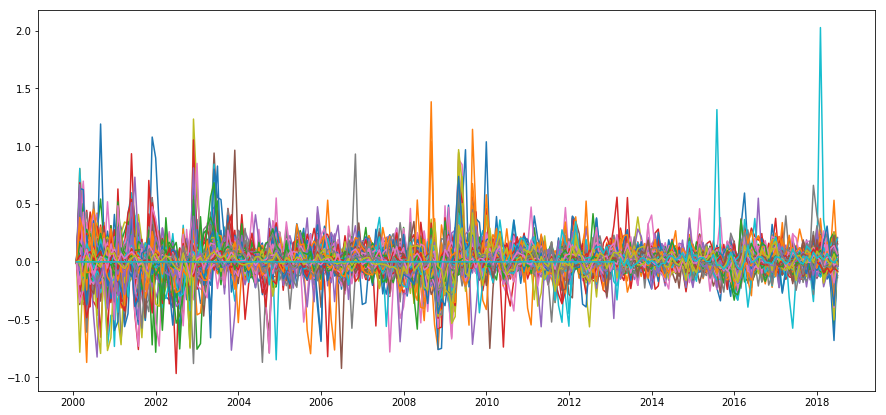

In [29]:
plt.figure(figsize=(15,7))
plt.plot(forward_returns)
plt.savefig('output.png', dpi=1200, bbox_inches='tight')

In [30]:
#writer1 = pd.ExcelWriter('strategy returns.xlsx')
#strategy_returns.to_excel(writer1,'Sheet1')
#writer1.save()

In [31]:
spy_returns = SPY.resample('M').mean()

In [32]:
spy_returns = spy_returns.pct_change()
spy_returns.head()

Ticker,SPY
Date,
2000-01-31,NaN
2000-02-29,-0.025863
2000-03-31,0.041152
2000-04-30,0.013231
2000-05-31,-0.029526


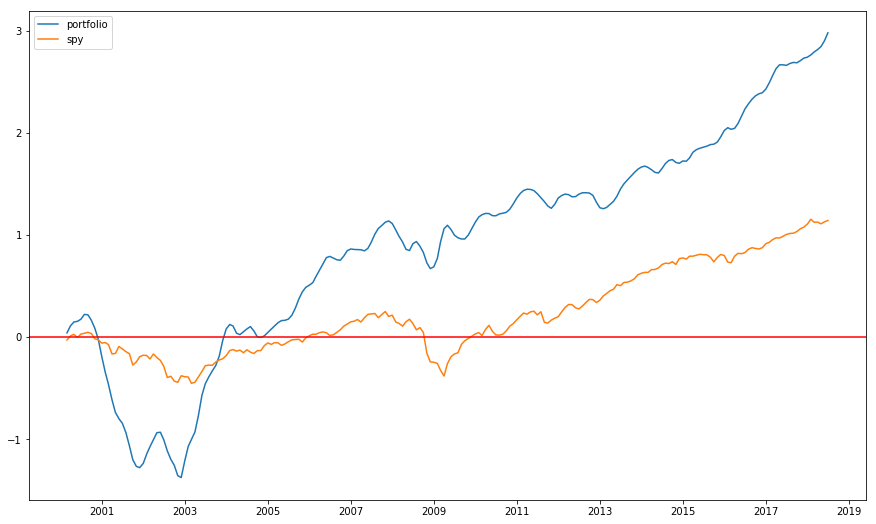

In [33]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(strategy_returns.cumsum(), label='portfolio')
ax.plot(spy_returns.cumsum(), label = 'spy')
ax.legend(loc='best')
#plt.xlable('equity lines')
plt.axhline(y=0,color = 'r')

In [35]:
writer= pd.ExcelWriter('data.xlsx')
forward_returns.to_excel(writer,'forward_returns')
mscores.to_excel(writer,'mscores')
writer.save()

In [ ]:
#writer1 = pd.ExcelWriter('spy.xlsx')
#spy_returns.to_excel(writer1,'Sheet1')
#writer1.save()

In [ ]:
#for

In [ ]:
#plt.figure(figsize=(15,7))
#plt.scatter(forward_returns,mscores)
